In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Import the testing dataset

In [11]:
# Load your dataset with columns 'tweet' and 'categories'
dataset = pd.read_csv("/Users/Hsuweic/Desktop/AI4health/dataset/testing dataset.csv")

print("Testing Set:"% dataset.columns, dataset.shape, len(dataset))
print(dataset.columns)

hate_speech = dataset['label'].sum()
print("Hate speech: ", hate_speech)
print("Non hate speech: ", len(dataset)-hate_speech)

Testing Set: (1000, 3) 1000
Index(['tweet', 'label', 'categories'], dtype='object')
Hate speech:  500
Non hate speech:  500


In [12]:
import re

def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", str(elem)))  
    return df

data_clean = clean_text(dataset, 'tweet')

In [19]:
# Split the data into X_test and y_test with the feature column 'tweet' and the target column 'label'
X_test = data_clean['tweet']
y_test = data_clean['label']

### Load the Detection model

                 precision    recall  f1-score   support

Non Hate Speech       0.57      0.95      0.72       500
    Hate Speech       0.86      0.29      0.44       500

       accuracy                           0.62      1000
      macro avg       0.72      0.62      0.58      1000
   weighted avg       0.72      0.62      0.58      1000



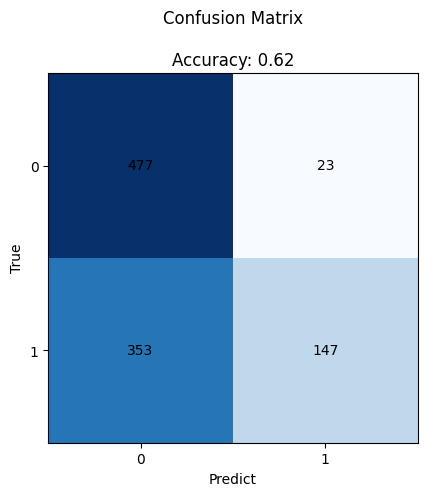

In [23]:
# Load the detection model
detection_model = joblib.load('/Users/Hsuweic/Desktop/AI4health/model/detection model.joblib')

class_labels = {0: 'Non Hate Speech', 1: 'Hate Speech'}

# Make predictions
y_predict = detection_model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

# Create a confusion matrix plot
fig, ax = plt.subplots()

# Plot the confusion matrix
for (j, i), label in np.ndenumerate(cm):
    ax.text(i, j, label, ha='center', va='center')

# Display the accuracy in the title
ax.set_title(f'Confusion Matrix\n\nAccuracy: {accuracy:.2f}')

# Customize the plot
ax.imshow(cm, cmap='Blues')
ax.set_xticks([1, 0])
ax.set_yticks([1, 0])
ax.set_xlabel('Predict')
ax.set_ylabel('True')

# Print classification report
print(classification_report(y_test, y_predict, target_names=class_labels.values()))


### Load the Classification model
Label Dictionary:
{'Race': 0, 'Sexual Orientation': 1, 'Gender': 2, 'Disability': 3, 'Class': 4, 'Ethnicity': 5, 'Physical Appearance': 6, 'Religion': 7, 'Behavior': 8}

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
import torch

# Example input tweet
input_tweet = "you are a nasty bitch and I hate you"

# Load the BERTweet tokenizer and model for sequence classification
model_path = "/Users/Hsuweic/Desktop/AI4health/model/classification model_4"
tokenizer = AutoTokenizer.from_pretrained(model_path)
classification_model = AutoModelForSequenceClassification.from_pretrained(model_path, num_labels=9)  # hate_categories = 9

# Tokenize the input tweet
inputs = tokenizer(input_tweet, return_tensors="pt")

# Forward pass through the model to obtain logits
with torch.no_grad():
    outputs = classification_model(**inputs)

# Get logits from the output
logits = outputs.logits

# Apply softmax to get probabilities
probabilities = torch.nn.functional.softmax(logits, dim=1)

# Choose the predicted class
predicted_class = torch.argmax(probabilities, dim=1).item()

print("Predicted class:", predicted_class)